# Extensive data preprocessing, visualization, and analysis using Python
Stackoverflow developer survey 2020 dataset was used to perform the analysis. The visualization covered the demographics of respondents such as country, unemployement, age etc. Then educational background of the respondents were covered. In the end, some questions related to trends in programming languages were answered. The major sections are highlighed.

# Data Preprocessing

In [53]:
#Importing relevant modules
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
#Importing datasets
survey_raw_df = pd.read_csv('survey_results_public.csv')
schema_raw = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText

The analysis is limited to the following areas
- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

In [37]:
#Extracing relevant columns
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]
len(selected_columns)

20

In [38]:
#Extracting that from the selected columns and putting it in a new dataframe
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

There are some missing values and because of that most columns have the object datatype. This datatype needs to be converted to perform evaluation.

In [39]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

There are two strings in the age column. We must deal with them before proceeding with converting them to numbers

In [40]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [41]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


We can see some problem with the data. For example, the maximum and minimum age is misleading and not possible. We've decided to delete such rows 

In [42]:
survey_df.drop(survey_df[survey_df.Age < 10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index,inplace=True)

In [43]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


In [45]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

That's a very diverse set of selections. We ignore the last four values to make analysis easier

In [49]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [50]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [52]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
47478,United States,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,7.0,2.0,HTML/CSS;Java;JavaScript;Objective-C;Python,Swift,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, front-end;Developer, mobile",40.0,Neither satisfied nor dissatisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Somewhat important
17105,United States,48.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",No,10.0,20.0,20.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;O...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
32854,Bangladesh,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,10.0,7.0,C;HTML/CSS;Java;JavaScript;PHP;SQL,Objective-C;Python,Once a year,NaN,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Neither satisfied nor dissatisfied,NaN,NaN,Fairly important
34527,United States,NaN,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,14.0,15.0,7.0,JavaScript;PHP;TypeScript,HTML/CSS;JavaScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Flex ...,Occasionally: 1-2 days per quarter but less th...,Critically important
28661,New Zealand,28.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,17.0,10.0,6.0,C#;HTML/CSS;Java;JavaScript;SQL;VBA,Go;Kotlin;Python;R;Ruby;Swift,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile",45.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Critically important
21699,Italy,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,20.0,11.0,5.0,JavaScript;Objective-C;PHP;SQL;Swift;TypeScript,Swift,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, mobile",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Fairly important
12749,United States,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,15.0,15.0,11.0,C#;HTML/CSS;JavaScript;PHP;SQL,C#;HTML/CSS;JavaScript;PHP;SQL,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, front-end",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
5615,India,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,11.0,7.0,Java;SQL,Java;Python;SQL;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Sys...",55.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
28254,Czech Republic,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,7.0,26.0,13

# Exploratory Data Analysis and Visualization

## Demographics

In [57]:
#Setting up graphing paramters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [58]:
schema.Country

'Where do you live?'

In [59]:
survey_df.Country.nunique()

183

In [60]:
#Looking at top 15 countries
top_countries = survey_df.Country.value_counts().head(15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


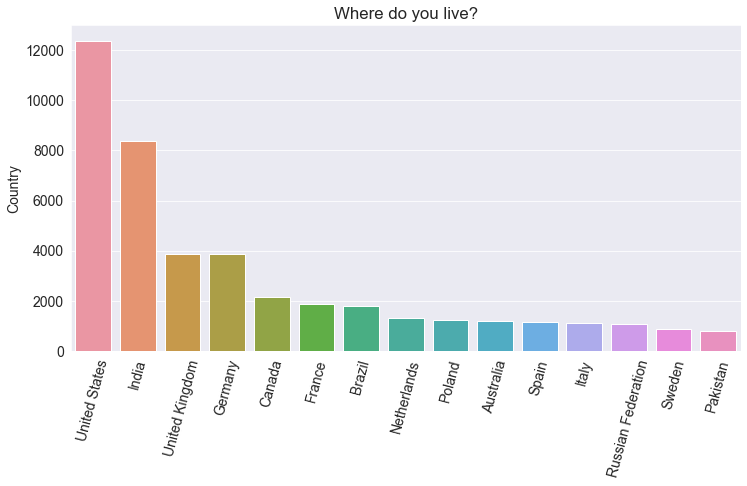

In [61]:
#Plotting countries against count
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries);

Disproprtionately high number of responses came from the United States and India

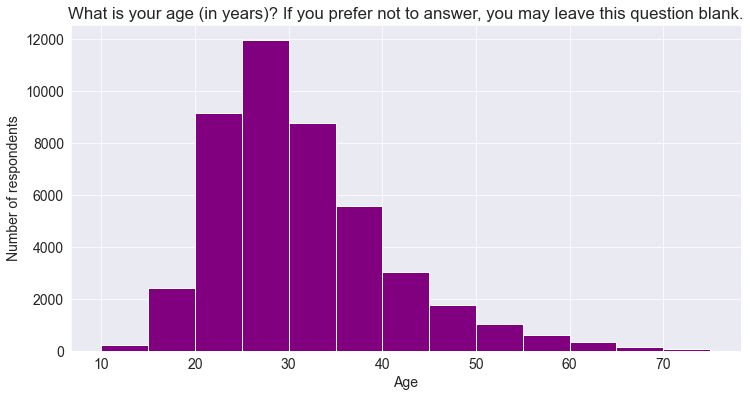

In [62]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins = np.arange(10,80,5), color='purple');

In [67]:
gender_counts = survey_df['Gender'].value_counts(dropna=False)
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

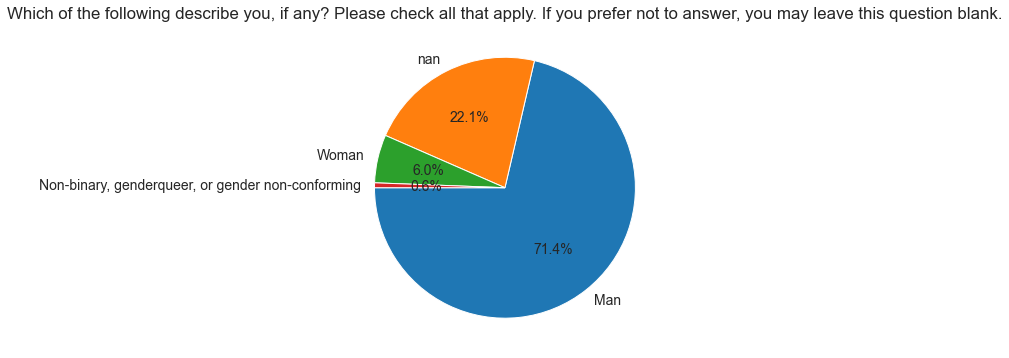

In [71]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 180);

The reponse is dominated by men. If we do not include people who have not answered, 90 of the responders are men.

Text(0, 0.5, '')

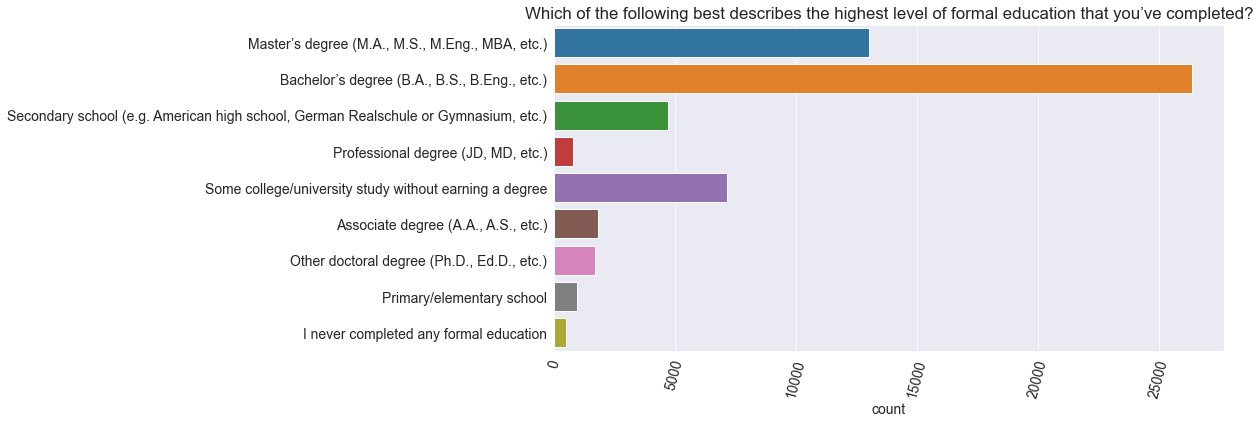

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation = 75)
plt.title(schema.EdLevel)
plt.ylabel(None)

Most programmers have some form of formal education. Over half of the respondents have a bachelors or masters degree.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Percentage')

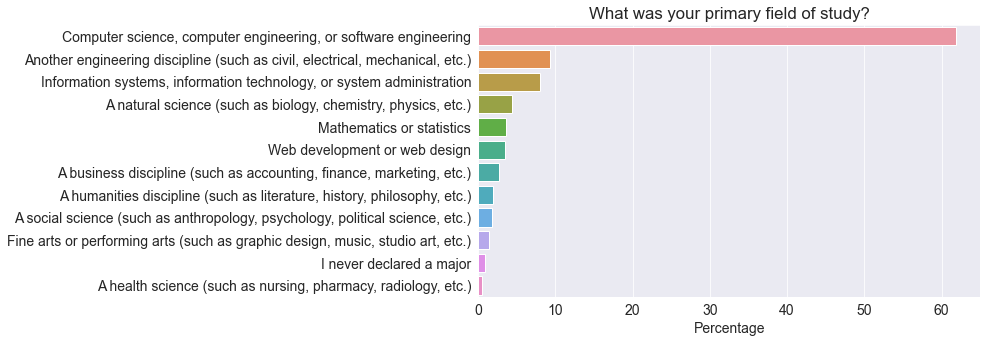

In [81]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()
sns.barplot(undergrad_pct, undergrad_pct.index);
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')


Over 60% respondents say that their field of study was related to programming. Around 40% of the people that do not have any background in programming have taken up programming, which is quite encouraging.

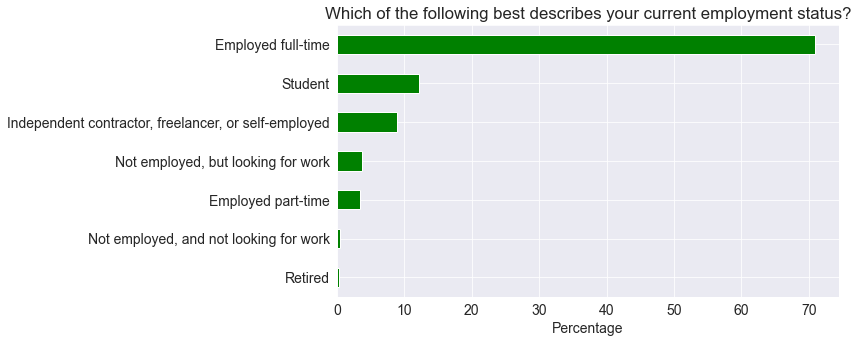

In [84]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

Many people are employed full time and the second most are students. Atleast 10% of people are working independently, which is quite encouraging.

In [85]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                       4396
Developer, back-end                                                                                                                                                                                                                         3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                              2214
Developer, back-end;Developer, full-stack                                                                                                                                                                                                   1465
Developer, front-end                

In [86]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [87]:
dev_type_df=split_multicolumn(survey_df.DevType)

In [88]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

# Answering Questions

**Q: What are the most popular programming languages in 2020?**


In [91]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [92]:
languages_worked_percentages = language_worked_df.mean().sort_values(ascending =False)*100 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


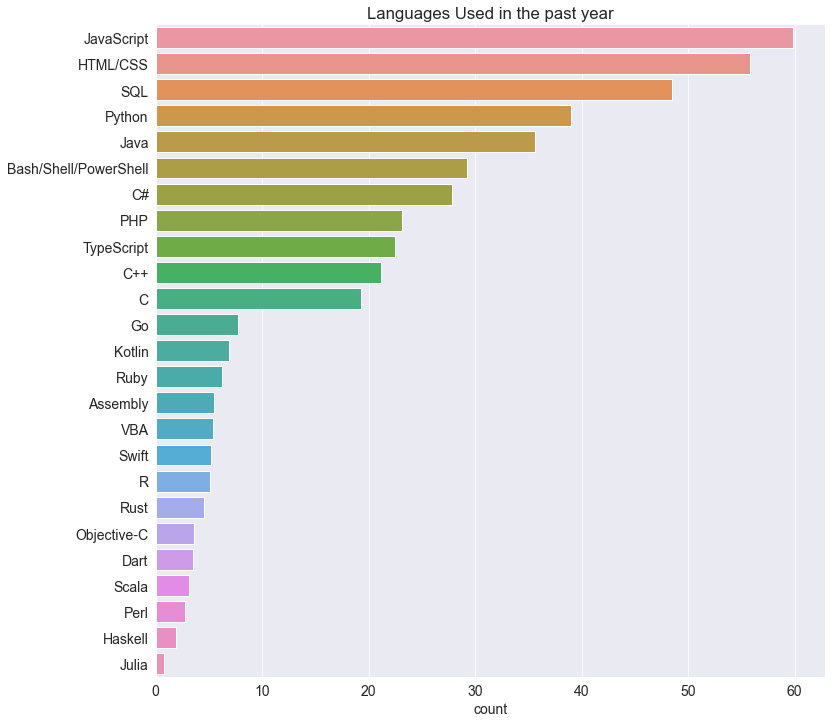

In [94]:
plt.figure(figsize=(12,12))
sns.barplot(languages_worked_percentages,languages_worked_percentages.index)
plt.title('Languages Used in the past year')
plt.xlabel('count');

Javascript was the most popular followed by HTML/CSS, which is not surprising as everything is moving to the web. All applications need some type of relational database. In non-web related development, python is the most popular.

**Q: Which languages are the most people interested to learn over the next year?**


In [96]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending =False)*100 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


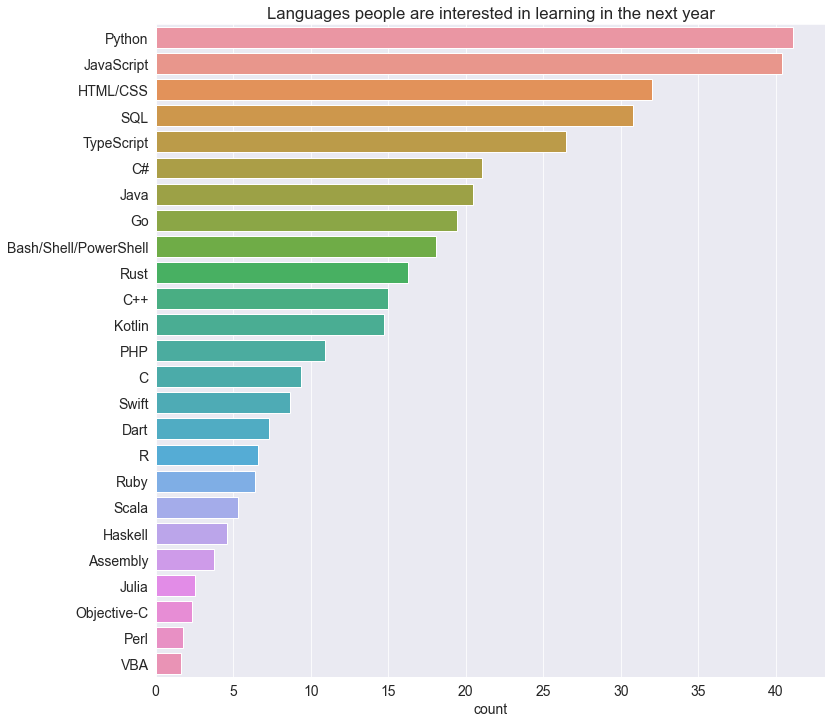

In [97]:
plt.figure(figsize=(12,12))
sns.barplot(languages_interested_percentages,languages_interested_percentages.index)
plt.title('Languages people are interested in learning in the next year')
plt.xlabel('count');

People are very interested in learning python because of its multi purpose nature

**Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?**

In [106]:
languages_loved_df = language_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum()*100 / language_worked_df.sum()).sort_values(ascending = False)  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


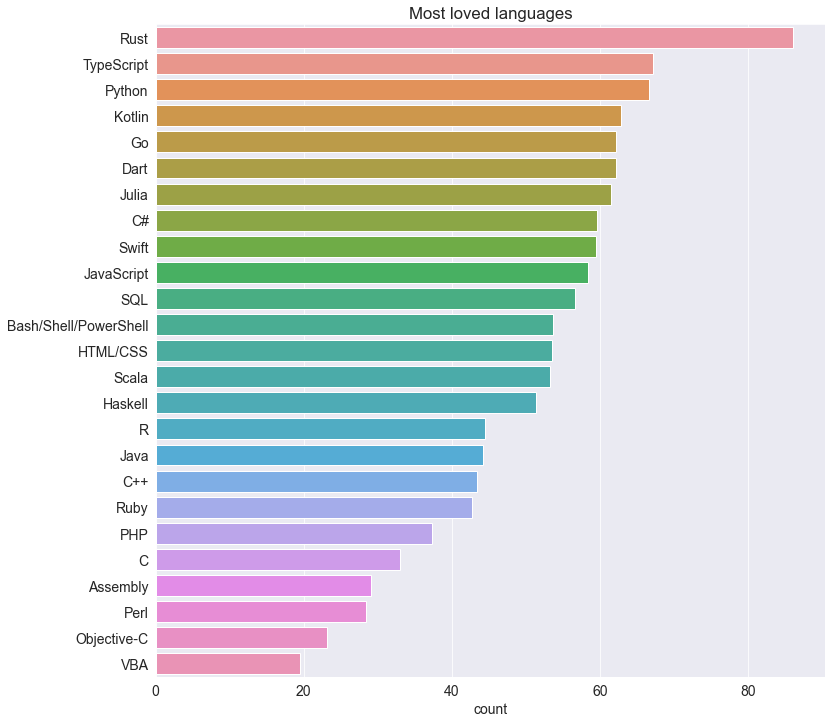

In [107]:
plt.figure(figsize=(12,12))
sns.barplot(languages_loved_percentages,languages_loved_percentages.index)
plt.title('Most loved languages')
plt.xlabel('count');

**Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

In [108]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending = False)

In [109]:
high_response_country_df = countries_df.loc[survey_df.Country.value_counts() >250].head(15)

**Q: How important is it to start young to build a career in programming?**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Years of professional coding experience')

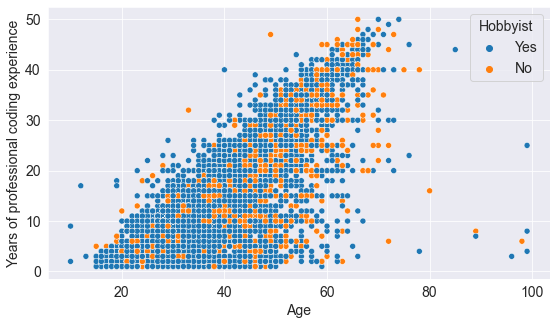

In [110]:
sns.scatterplot('Age','YearsCodePro',hue='Hobbyist', data=survey_df)
plt.xlabel('Age')
plt.ylabel('Years of professional coding experience')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


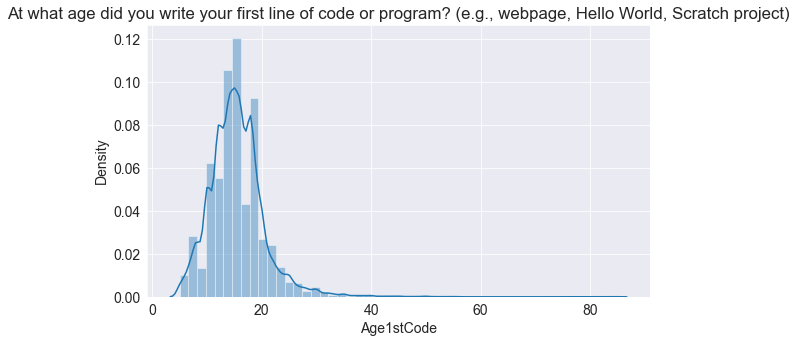

In [111]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode);